In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pyarrow.parquet as pq

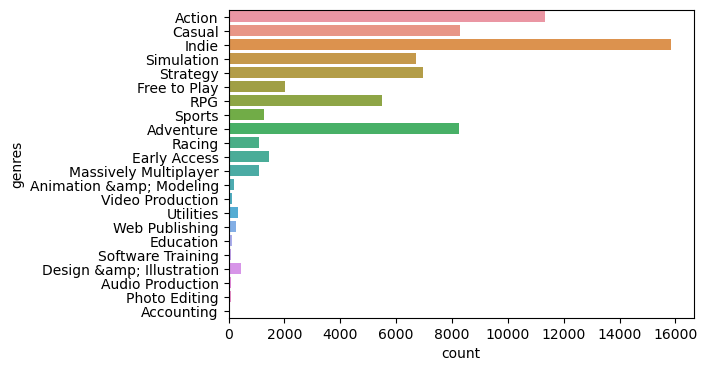

In [13]:
# Cargo el archivo de juegos en un dataframe
steam_games_df = pd.read_parquet("../data_sources/parquet/games_model.parquet")

# Contabilizo los generos
cantidad_generos= steam_games_df["genres"].value_counts().to_frame

# Creo el gráfico de generos
plt.figure(figsize=(6, 4))
sns.countplot(data=steam_games_df, y='genres', orient='h')
plt.show()


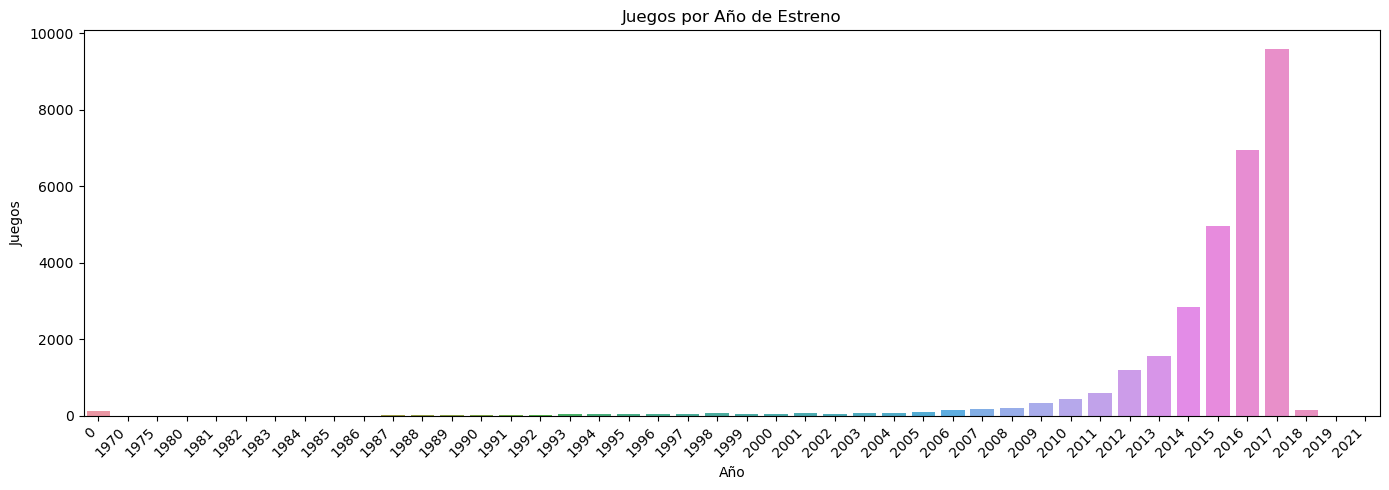

In [24]:
# Cargo el archivo parquet steam_games en un dataframe
steam_games_df = pd.read_parquet("../data_sources/parquet/steam_games.parquet")

# Contabilizo y ordeno
games_per_year = steam_games_df["release_year"].value_counts().sort_index()

plt.figure(figsize=(14, 5))
sns.barplot(x=games_per_year.index, y=games_per_year.values)
plt.xlabel('Año'); plt.ylabel('Juegos') ; plt.title('Juegos por Año de Estreno')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


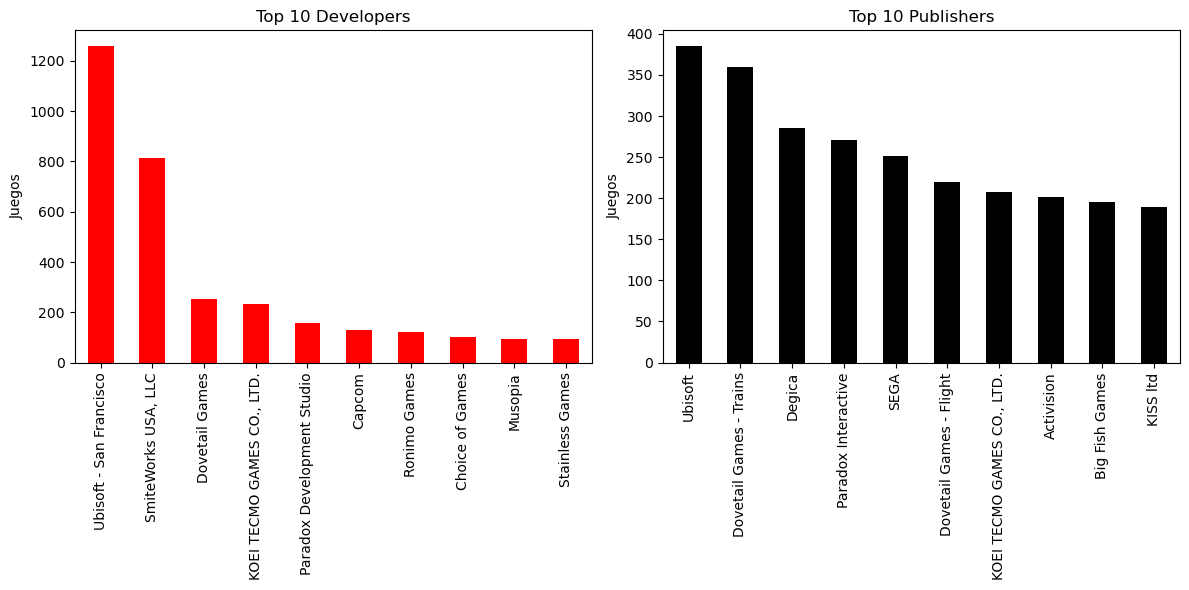

In [40]:
# Directorio que contiene los archivos Parquet
dir = '../data_sources/parquet/steam_games'

# Lista para almacenar los DataFrames
list_of_dfs = []

# Recorrer los archivos Parquet en el directorio
for file in os.listdir(dir):
    if file.endswith('.parquet'):
        # Leer el archivo Parquet
        list_of_dfs.append(pq.read_table(os.path.join(dir, file)).to_pandas())

steam_games_df = pd.concat(list_of_dfs, ignore_index=True)

# Contabilizo los desarrolladores y los publicadores
developers = steam_games_df["developer"].value_counts()
publishers = steam_games_df["publisher"].value_counts()

# Crear una figura con dos subplots
plt.figure(figsize=(12, 6))

# Primer subplot para los desarrolladores
plt.subplot(1, 2, 1)
developers[:10].plot(kind='bar', color='red')
plt.ylabel('Juegos') ; plt.title('Top 10 Developers')

# Segundo subplot para los publicadores
plt.subplot(1, 2, 2)
publishers[:10].plot(kind='bar', color='black')
plt.ylabel('Juegos') ; plt.title('Top 10 Publishers')

# Muestra y ajustar el espaciado
plt.tight_layout()
plt.show()
